# Chapter 7


## Review

### The task of statistical inference redeux

We are trying to use data to infer what the probability distribution is that is generating the data. 

Some paradigmatic examples:

- On the basis of a certain number of flips, are we dealing with a fair coin or a biased coin? More concretely: on the basis of a number of trials, are we dealing with a medical procedure where the chances of success are 50/50 or where they are 70/30?

- On the basis of a number of measurements, are we dealing with a normal distribution which has its center more near 4 or farther away from 4? More concretely: supposing that untreated patients have a health metric which averages at 4 across a large population and is normally distributed, does treating patients with a new intervention result in any move away from an average of 4? 

I use medical examples to make it concrete, but one can imagine substituting in any 'procedures' or 'interventions' of many different kinds, e.g. social or economic or epistemic. 

### The setup 

We are taking measurements in the form of independent random variables $X_1, \ldots, X_n$.

We want to know what their common probability distribution is. This is recorded in the pdf, cdf, of ccdf. For simplicity, let's choose the cdf.

We agree ahead of time that the probability distribution comes from a family $\{F_{\theta}: \theta\in \Theta\}$, where $\Theta$ is the parameter space and as one varies the parameter $\theta$ from $\Theta$ one gets different options for the probability distribution.

In the actual world $\omega$, we observe data in the form $X_1(\omega), \ldots, X_n(\omega)$. This will be a length $n$ sequence of real numbers.

We develop methods for inferring from this data towards what the value of the parameter $\theta$ is which is generating our data.

Whether we are right or wrong and in what way will be quantified by what happens with this inference method across all the worlds.

## Two paradigmatic examples

### Example 1 inferring whether a coin is fair

We are repeatedly and independently flipping a coin $X_1, \ldots, X_n$.

We want to know the value of $p$ such that $X_1, \ldots, X_n\sim \mathrm{Bern}(p)$.

We formulate two hypotheses:

- The null hypothesis $H_0$: $\hspace{5mm}$ $p=\frac{1}{2}$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $p \neq \frac{1}{2}$. 

We choose a comparatively large value $0\leq c<n$, and we adopt the following test:

- Test: reject $H_0$ if $T_n\geq c$.

where $T_n = \sum_{i=1}^n X_i$ is the sum of the number of heads.

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and so in employing our test

> we insure that, in the long run of experience, we shall not be too often wrong ({cite}`Neyman1933-zd` p. 291)

In other words:

> if we behave according to such a rule [the test], then in the long run we shall reject $H_0$ when it is true not more, say than once in a hundred times   ({cite}`Neyman1933-zd` p. 291; notation $H$ changed to $H_0$ to match preceding.)

In our example, we can indeed quantify how probable the event $T_n\geq c$ is, assuming the null hypothesis is true: it is just given by plugging $c$ into the pdf + ccdf of $\mathrm{Binom}(n,\frac{1}{2})$ (it is the sum since the pdf handles equality and the ccdf handles strict greater than).

Below is a simple visual representation, where the key fact is that in the graph to the right we see that as we make $c$ bigger, the event becomes rarer and rarer. The red line marks 5% (and so 5 out of a hundred rather than 1 out of a hundred), and so the value of c at which the blue line crosses the red line is the value of c such that the probability of the event $T_n\geq c$ falls under 5%, assuming the null hypothesis is true.

In [1]:
# parameters of the binomial distribution

n1 = 50   # set value of n, number of trials
p = .5 # set value of p, probability of trial for X


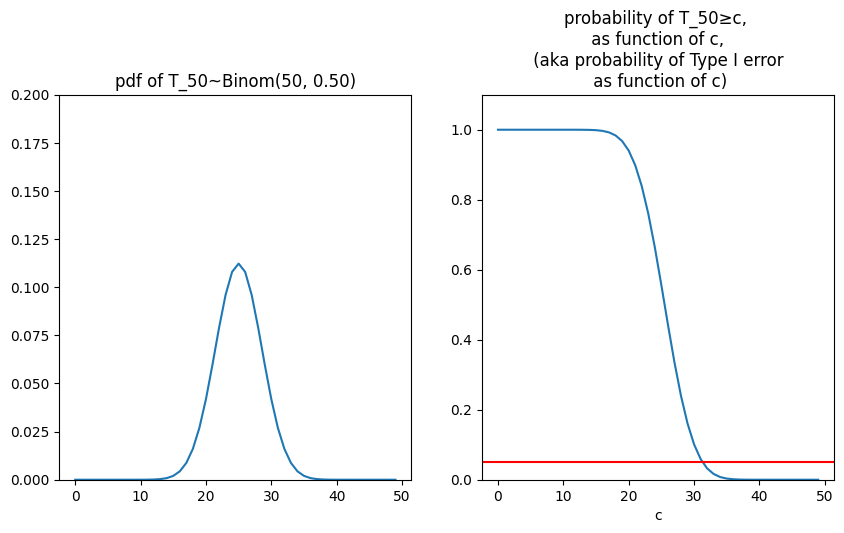

In [2]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution

v = np.arange(0, n1) # values for x-axis
Xpdf = binom.pmf(v, n1, p) # pdf for X
Xcdf = binom.cdf(v, n1, p) # cdf for X
Xccdf = 1-Xcdf               # ccdf for X

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

 # Plot the PDF on the first subplot
axs[0].plot(v, Xpdf)
axs[0].set_ylim(0, .2)
axs[0].set_title('pdf of T_%i~Binom(%i, %1.2f)' % (n1,n1,p))

# Plot the CCDF on the second subplot
axs[1].plot(v, Xpdf+Xccdf)
axs[1].set_ylim(0, 1.1)
axs[1].set_title('probability of T_%i≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % n1)
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r', label='.05')

plt.show()

### Example 2 inferring where the normal with known variance is centered

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. For the sake of concreteness, suppose that the variance is 9.

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,9)$.

That is, we imagine we already know that the variance is 9, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is at 4:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=4$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq 4$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - 4\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and so in employing our test

> we insure that, in the long run of experience, we shall not be too often wrong ({cite}`Neyman1933-zd` p. 291)

In other words:

> if we behave according to such a rule [the test], then in the long run we shall reject $H_0$ when it is true not more, say than once in a hundred times   ({cite}`Neyman1933-zd` p. 291; notation $H$ changed to $H_0$ to match preceding.)

In our example, we can again quantify how rare the event $T_n\geq c$ is, assuming the null hypothesis is true. It is the union of the events $\overline{X}_n\geq 4+c$ and $\overline{X}_n\leq 4-c$. And it turns out that $\overline{X}_n$ is also normal with $\overline{X}_n\sim N(4,\frac{9}{n})$.

Below is a simple visual representation, where the key thing is that in diagram to right as we make c bigger and bigger the probability gets smaller and smaller. The red line marks 5% (and so 5 out of a hundred rather than 1 out of a hundred), and so the value of c at which the blue line crosses the red line is the value of c such that the probability of the event $T_n\geq c$ falls under 5%, assuming the null hypothesis is true.   

In [3]:
# number of independent observations

n2 = 10

# parameters of the normal distribution

mu = 4  # mean
var = 3**2 #variance


In [4]:
# variance of the average

varavg = var / n2  # variance of the average

# standard deviation of the average

sigma = np.sqrt(var)
sigmaavg = np.sqrt(varavg)


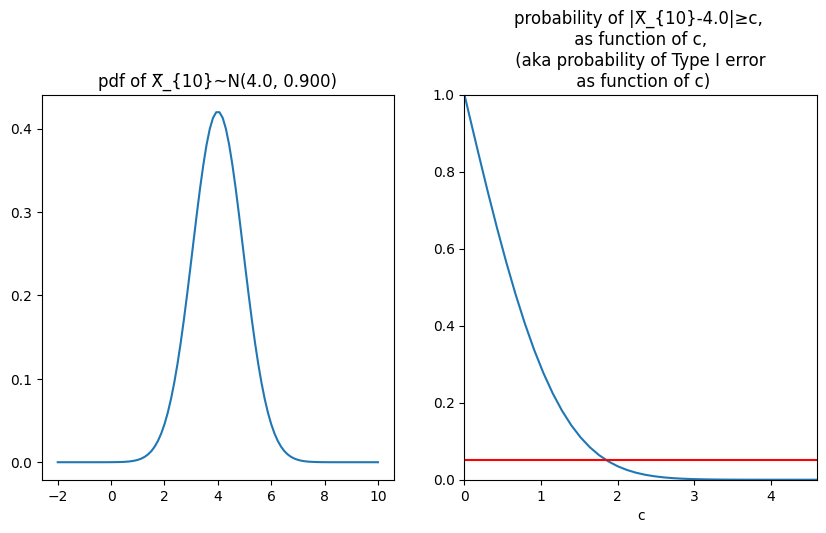

In [5]:
from scipy.stats import norm     # load normal distribution

# Create a range
x = np.linspace(mu-2*sigma, mu+2*sigma, 100)

# Create the normal distribution for the range
y = norm.pdf(x, mu, sigma)
yavg = norm.pdf(x, mu, sigmaavg)
tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the normal distribution on the left subplot
axs[0].plot(x, yavg)
axs[1].plot(x, tavg)
axs[1].set_xlim(0, mu+2*sigma / 10)
axs[1].set_ylim(0, 1)    

# Plot the histogram on the right subplot
# axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

# Set titles
axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n2, mu, varavg))
axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n2, mu))
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r', label='.05')

plt.show()

## Two types of error

We can distinguish two ways in which our tests can go wrong:

- Type I error: the null hypothesis is true but our test rejects it. This would be when we observe $T_n(\omega)\geq c$, where $\omega$ is the actual world, and where the application of our rule leads us to mistakenly conclude that the null hypothesis is false.
- Type II error: the null hypothesis is false but our test fails to reject it. This would be when we observe $T_n(\omega)<c$, where $\omega$ is the actual world, and so our test does not rule out the null hypothesis even though it is false.

There are two probabilities associated to these errors:

- Probability of a Type I Error: under the assumption that the null hypothesis is true, the probability of the event $T_n\geq c$.
- Probability of Type II Error: under the assumption that the null hypothesis is false, the probability of the event $T_n<c$.


In the examples above, the null hypothesis was a single probability distribution, and so one can attach a specific value to the first kind of probability, once one has fixed $n$ and $c$. The diagrams to the right in the above examples were graphing the probability of the Type I Error as a function of $c$ (assuming the choice of $n$ is fixed).

We can go back through the two examples and graph the probability of the Type II error for some specific alternatives.

As the examples show, it is hard to get both the probability of both the Type I and Type II error low. The traditional choice is to first try to keep the probability of the Type I error below some low number, like .05, and then do the best one can about the Type II error. 

### Example 1 revisited

In [6]:
# parameters of the binomial distribution

n1 = 50   # set value of n, number of trials
p = .5 # set value of p, null hypothesis 
q = .6 # set value of q, a specific alternative hypothesis.


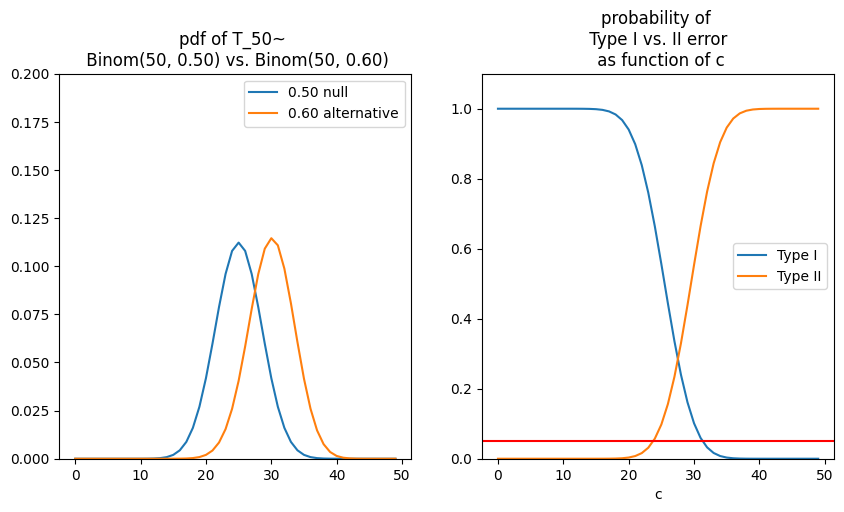

In [7]:
v = np.arange(0, n1) # values for x-axis
Xpdf = binom.pmf(v, n1, p) # pdf for X
Xcdf = binom.cdf(v, n1, p) # cdf for X
Xccdf = 1-Xcdf               # ccdf for X
Ypdf = binom.pmf(v, n1, q) # pdf for Y\
Ycdf = binom.cdf(v, n1, q) # cdf for Y
Yccdf = 1-Ycdf               # ccdf for Y


fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

axs[0].plot(v, Xpdf, label='%1.2f null' % p)
axs[0].plot(v, Ypdf, label='%1.2f alternative' % q)
axs[0].set_ylim(0, .2)
axs[0].set_title('pdf of T_%i~ \n Binom(%i, %1.2f) vs. Binom(%i, %1.2f)' % (n1,n1,p, n1, q))
axs[0].legend()

axs[1].plot(v, Xpdf+Xccdf, label='Type I')
axs[1].plot(v, Ycdf, color ='C1', label='Type II')
axs[1].set_ylim(0, 1.1)
axs[1].set_title('probability of \n Type I vs. II error \n as function of c')
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r')
axs[1].legend()

plt.show()

### Example 2 revisited

In [8]:
# number of independent observations

n2 = 10

# parameters of the normal distribution for null hypotheis

mu0 = 4  # mean
var = 3**2 #variance

# parameters of the normal distribution for an alternative hypothesis

mu = 5  # mean



In [9]:
# variance of the average

varavg = var / n2  # variance of the average

# standard deviation of the average

sigma = np.sqrt(var)
sigmaavg = np.sqrt(varavg)


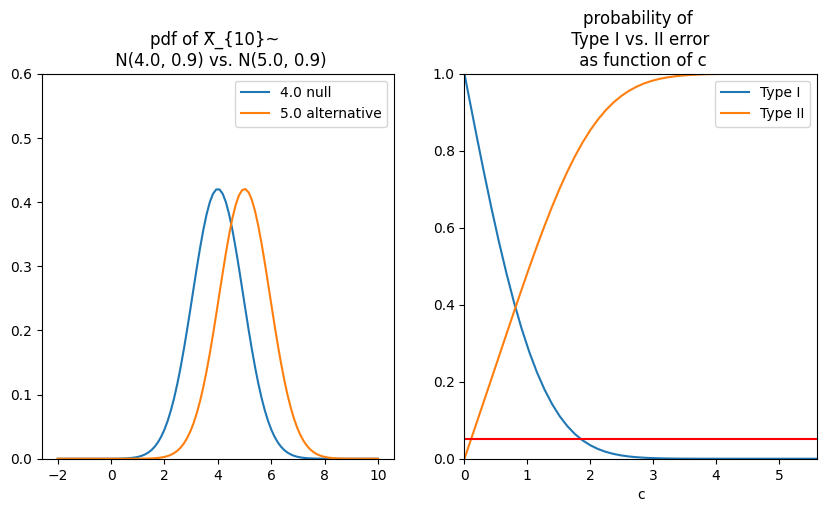

In [10]:
from scipy.stats import norm     # load normal distribution

# Create a range
x = np.linspace(mu0-2*sigma, mu0+2*sigma, 100)

# Create the normal distribution for the range
y = norm.pdf(x, mu0, sigma)
yavg = norm.pdf(x, mu0, sigmaavg)
zavg = norm.pdf(x, mu, sigmaavg)
tavg = 1-norm.cdf(mu0+x, mu0, sigmaavg)+norm.cdf(mu0-x, mu0, sigmaavg)
savg = norm.cdf(mu0+x, mu, sigmaavg)-norm.cdf(mu0-x, mu, sigmaavg)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the normal distribution on the left subplot
axs[0].plot(x, yavg, label='%1.1f null' % mu0)
axs[0].plot(x, zavg, label='%1.1f alternative' % mu)
axs[0].set_ylim(0, .6) 
axs[0].legend() 
axs[1].plot(x, tavg, label='Type I')
axs[1].set_xlim(0, mu0+2*sigma / 10)
axs[1].set_ylim(0, 1)    
axs[1].plot(x, savg, color = 'C1', label='Type II')
axs[1].set_xlim(0, mu+2*sigma / 10)
axs[1].legend()

# Plot the histogram on the right subplot
# axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

# Set titles
axs[0].set_title('pdf of X̅_{%i}~ \n N(%1.1f, %1.1f) vs. N(%1.1f, %1.1f)' % (n2, mu0, varavg, mu, varavg))
axs[1].set_title('probability of \n Type I vs. II error \n as function of c')
axs[1].set_xlabel('c')  # Add x-axis label
axs[1].axhline(y=.05, color='r', label='.05')


plt.show()

## Mayo on hypothesis testing

Among philosophers, Mayo has argued for a place for classical hypothesis testing in the philosophy of science and in theory choice more broadly. Her view is that:

> Evidence $e$ should be taken as good grounds for $H_1$ to the extent that $H_1$ has passed a *severe* test with $e$ ({cite}`Mayo1996-re` p. 177; changed $H$ to $H_1$ to better match our discussion here).

What does it mean for $H_1$ to have passed a severe test $T$ by means of evidence $e$? Mayo tells us a few pages later:

$H_1$ passes a severe test $T$ by means of evidence $e$ iff it passes and moreover 

> there is a very low probability that test procedure $T$ would yield such a passing result [for $H_1$], if $H_1$ were false ({cite}`Mayo1996-re` p. 180, Severity criterion 1b; changed $H$ to $H_1$ to better match our discussion here).

To see the connection to our previous discussion:

- As in our previous discussion, suppose that $H_0$ and $H_1$ are genuine contraries, in that one and only one can be true.

- Suppose that test $T$ yields a passing result for $H_1$ iff test $T$ rejects $H_0$.

With these minor emendations, Mayo's previous quotation reads as follows:

$H_1$ passes a severe test $T$ by means of evidence $e$ iff $H_0$ is rejected by $T$ with evidence $e$ and moreover 

> there is a very low probability that test procedure $T$ would reject $H_0$ if $H_0$ were true.

One way to convince yourself that this reading is right is to look at her statistical example on pp. 192-193. This is just our Example 1 up above with $n=100$ and $c=60$. She writes $H^{\prime}$ for our $H_1$, and she writes $H_0$ for our $H_0$.

Hence, Mayo's severe test has as one component just a low probability of a Type I error. The other component is that the evidence actually pass the test.

In our statistical examples, the evidence actually passing the test would be $T_n(\omega)\geq c$, where $\omega$ is the actual world.

The virtue of Mayo's account is that it tries to identify a more general constraint on the confirmation of hypotheses that is satisfied by the tradition of classical statistics. That is, it tries to identify some of the overiding rationale of this tradition.

Mayo applies this to the problem of the traditional problem of the underdetermination of hypotheses by evidence. Her perferred formulation of the challenge is the plausibility of the following:

> *Methodological underdetermination [MUD]*: any evidence taken as a good test of (or good support for) hypothesis $H_1$ would (on that account of testing or support) be taken as an equally good test of (or equally good support for) some rival [$H_2$] to $H_1$ ({cite}`Mayo1996-re` p. 176)


Other traditional views about hypotheses testing have a hard time responding to this challenge:

- Deductive approaches view $H_1$ and its rivals $H_2$ as formal theories that are confirmed by evidence $e$ which is formally entailed by the theories, e.g. $H_i\vdash e$. But it is pretty easy to cook up lots of alternative ways to deduce a given result by e.g. adding on extraneous axioms.

- Bayesian approaches view $H_1$ and its rivials $H_2$ as confirming evidence $e$ by making $P(H_i\mid e)-P(H_i)$ a large number. But it is easy to make this happen for a large number of theories, as long as one is willing to make the sample space big enough with a enough pockets of non-zero probability.


Mayo thinks that her approach has an advantage, since on the classical statistical picture the null hypothesis $H_0$ and $H_1$ partition the options. If one is asking about another rival $H_2$ to $H_1$, one is really asking the "wrong question," as far as the test at issue is concerned ({cite}`Mayo1996-re` p. 189)